House Pricing Predictor 

In [1]:
#importing required libraries and packages
#Data Handling
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Machine Learning (from scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#loading the csv file
df=pd.read_csv('house_data.csv')

In [5]:
#displaying data
df

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,1000,1,2,1,2020,1,7,2,Stirling,1100000
1,1500,1,3,2,2021,1,8,2,Greenwich,1500000
2,1200,2,2,1,2018,1,6,1,England,9300000
3,2000,2,3,2,2023,2,9,3,London,8000000
4,2000,1,2,1,2024,1,10,2,Mumbai,1200000
5,1800,2,1,1,2019,1,8,1,Edinburge,2800000
6,1600,2,3,2,2024,2,9,3,Birmingham,3900000
7,1900,2,3,1,2023,3,9,3,Woolwich,2100000
8,2500,2,1,2,2015,1,6,2,Leeds,2600000
9,2300,1,1,1,2020,3,8,3,Manchester,1800000


In [6]:
#display first 5 rows 
df.head() 

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,1000,1,2,1,2020,1,7,2,Stirling,1100000
1,1500,1,3,2,2021,1,8,2,Greenwich,1500000
2,1200,2,2,1,2018,1,6,1,England,9300000
3,2000,2,3,2,2023,2,9,3,London,8000000
4,2000,1,2,1,2024,1,10,2,Mumbai,1200000


In [7]:
#describing the data 
df.describe()

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Price
count,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1950.000000,1.65000,1.85000,1.400000,2019.650000,1.600000,7.700000,2.300000,4.015000e+06
std,490.434823,0.48936,0.74516,0.502625,3.297128,0.753937,1.218282,0.923381,2.670359e+06
min,1000.000000,1.00000,1.00000,1.000000,2013.000000,1.000000,6.000000,1.000000,1.100000e+06
25%,1675.000000,1.00000,1.00000,1.000000,2018.000000,1.000000,7.000000,2.000000,1.875000e+06
50%,1950.000000,2.00000,2.00000,1.000000,2020.000000,1.000000,8.000000,2.000000,3.150000e+06
75%,2150.000000,2.00000,2.00000,2.000000,2022.250000,2.000000,9.000000,3.000000,5.800000e+06
max,2900.000000,2.00000,3.00000,2.000000,2024.000000,3.000000,10.000000,4.000000,9.300000e+06


In [8]:
df.tail()

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
15,1400,1,1,1,2021,1,9,4,Lanchaster,1900000
16,2800,2,2,1,2022,2,7,2,Salford,8300000
17,1900,2,2,1,2022,1,6,3,Preston,5400000
18,2900,1,1,2,2018,2,8,2,St Albans,7600000
19,2500,2,2,2,2016,1,7,1,Sunderland,4800000


In [9]:
#method to find missing data if any
df.isnull().sum()

SquareFeet    0
Hall          0
Bathrooms     0
Kitchen       0
YearBuilt     0
Floors        0
Condition     0
Bedrooms      0
Location      0
Price         0
dtype: int64

In [10]:
df.isnull()

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [11]:
#Data Cleaning 
df = df.drop_duplicates()


In [12]:
#if any null or nan value present then you can do it with following 2 ways
#df["SquareFeet"].fillna(df["SquareFeet"].mean(), inplace=True               //for numerical vales
#df["Neighborhood"].fillna(df["Neighborhood"].mode()[0], inplace=True)       //for categorical values

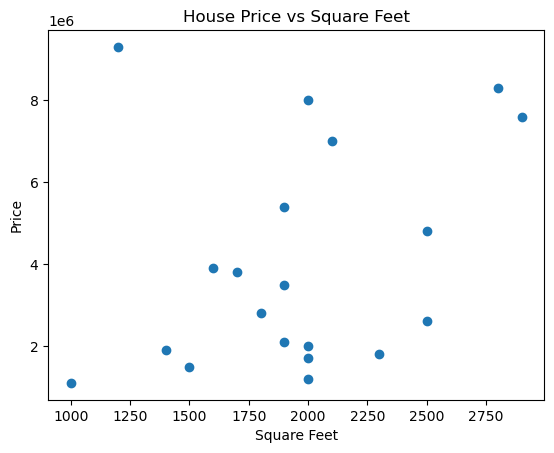

In [13]:
plt.scatter(df["SquareFeet"], df["Price"])
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("House Price vs Square Feet")
plt.show()

<Axes: xlabel='YearBuilt', ylabel='Price'>

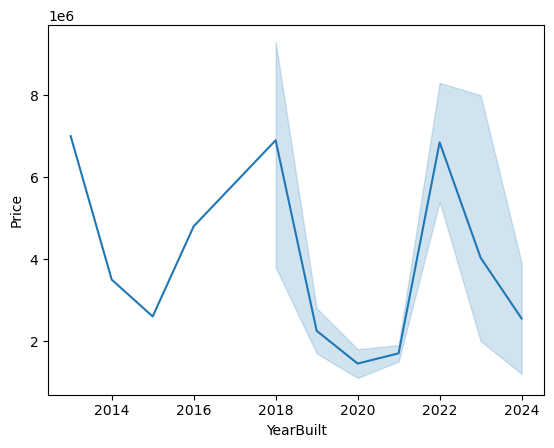

In [14]:
sns.lineplot(x="YearBuilt", y="Price", data=df)


In [15]:
# Example: features and target
X = df[["SquareFeet","Hall","Bathrooms", "Kitchen", "YearBuilt","Floors","Condition","Bedrooms"]]  # independent variables
y = df["Price"]  # target variable


In [16]:
df.dtypes


SquareFeet     int64
Hall           int64
Bathrooms      int64
Kitchen        int64
YearBuilt      int64
Floors         int64
Condition      int64
Bedrooms       int64
Location      object
Price          int64
dtype: object

In [17]:
df.dtypes


SquareFeet     int64
Hall           int64
Bathrooms      int64
Kitchen        int64
YearBuilt      int64
Floors         int64
Condition      int64
Bedrooms       int64
Location      object
Price          int64
dtype: object

In [18]:
#for traning with 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
#making predictions
y_pred = model.predict(X_test)
print(y_pred)

[5409189.3627609  3236345.61097264   73322.15176678 7335999.21580255]


In [21]:
#Evaluating Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 15161538021840.746
R² Score: -4.171277091226859


In [22]:
df

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,1000,1,2,1,2020,1,7,2,Stirling,1100000
1,1500,1,3,2,2021,1,8,2,Greenwich,1500000
2,1200,2,2,1,2018,1,6,1,England,9300000
3,2000,2,3,2,2023,2,9,3,London,8000000
4,2000,1,2,1,2024,1,10,2,Mumbai,1200000
5,1800,2,1,1,2019,1,8,1,Edinburge,2800000
6,1600,2,3,2,2024,2,9,3,Birmingham,3900000
7,1900,2,3,1,2023,3,9,3,Woolwich,2100000
8,2500,2,1,2,2015,1,6,2,Leeds,2600000
9,2300,1,1,1,2020,3,8,3,Manchester,1800000


In [23]:
# Example new data 
new_data = pd.DataFrame({
    'SquareFeet': [1200],
    'Hall': [1],
    'Bathrooms': [1],
    'Kitchen':[2],
    'YearBuilt': [1],
    'Floors':[2],
    'Condition':[5],
    'Bedrooms':[2]
})

predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 622696170.921628


In [24]:
df.head()

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,1000,1,2,1,2020,1,7,2,Stirling,1100000
1,1500,1,3,2,2021,1,8,2,Greenwich,1500000
2,1200,2,2,1,2018,1,6,1,England,9300000
3,2000,2,3,2,2023,2,9,3,London,8000000
4,2000,1,2,1,2024,1,10,2,Mumbai,1200000


In [25]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Price')
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [26]:
df.head()

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Location,Price
0,0.000000,0.0,0.5,0.0,0.636364,0.0,0.25,0.333333,Stirling,1100000
1,0.263158,0.0,1.0,1.0,0.727273,0.0,0.50,0.333333,Greenwich,1500000
2,0.105263,1.0,0.5,0.0,0.454545,0.0,0.00,0.000000,England,9300000
3,0.526316,1.0,1.0,1.0,0.909091,0.5,0.75,0.666667,London,8000000
4,0.526316,0.0,0.5,0.0,1.000000,0.0,1.00,0.333333,Mumbai,1200000


In [27]:
# Example new data 
new_data = pd.DataFrame({
    'SquareFeet': [1200],
    'Hall': [1],
    'Bathrooms': [1],
    'Kitchen':[2],
    'YearBuilt': [1],
    'Floors':[2],
    'Condition':[5],
    'Bedrooms':[2]
})

predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 622696170.921628


In [28]:
df = pd.get_dummies(df, drop_first=True)


In [29]:
df

,SquareFeet,Hall,Bathrooms,Kitchen,YearBuilt,Floors,Condition,Bedrooms,Price,Location_Bristol,...,Location_Manchester,Location_Mumbai,Location_Norwich,Location_Nottingham,Location_Preston,Location_Salford,Location_St Albans,Location_Stirling,Location_Sunderland,Location_Woolwich
0,0.000000,0.0,0.5,0.0,0.636364,0.0,0.25,0.333333,1100000,False,...,False,False,False,False,False,False,False,True,False,False
1,0.263158,0.0,1.0,1.0,0.727273,0.0,0.50,0.333333,1500000,False,...,False,False,False,False,False,False,False,False,False,False
2,0.105263,1.0,0.5,0.0,0.454545,0.0,0.00,0.000000,9300000,False,...,False,False,False,False,False,False,False,False,False,False
3,0.526316,1.0,1.0,1.0,0.909091,0.5,0.75,0.666667,8000000,False,...,False,False,False,False,False,False,False,False,False,False
4,0.526316,0.0,0.5,0.0,1.000000,0.0,1.00,0.333333,1200000,False,...,False,True,False,False,False,False,False,False,False,False
5,0.421053,1.0,0.0,0.0,0.545455,0.0,0.50,0.000000,2800000,False,...,False,False,False,False,False,False,False,False,False,False
6,0.315789,1.0,1.0,1.0,1.000000,0.5,0.75,0.666667,3900000,False,...,False,False,False,False,False,False,False,False,False,False
7,0.473684,1.0,1.0,0.0,0.909091,1.0,0.75,0.666667,2100000,False,...,False,False,False,False,False,False,False,False,False,True
8,0.789474,1.0,0.0,1.0,0.181818,0.0,0.00,0.333333,2600000,False,...,False,False,False,False,False,False,False,False,False,False
9,0.684211,0.0,0.0,0.0,0.636364,1.0,0.50,0.666667,1800000,False,...,True,False,False,False,False,False,False,False,False,False


In [30]:
from sklearn.ensemble import RandomForestRegressor


In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# Example new data 
new_data = pd.DataFrame({
    'SquareFeet': [1200],
    'Hall': [1],
    'Bathrooms': [1],
    'Kitchen':[2],
    'YearBuilt': [1],
    'Floors':[2],
    'Condition':[5],
    'Bedrooms':[2]
})

predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 6754000.0


Finally,we got the prediction price as 67,54,000.0 for our House.

in summary, RandomForestRegressor is such an amazing Model that helped me to find out a really "Near to the perfect value". Thanks !!